In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [27]:
data = pd.read_csv('pySpark_itog.csv')

data

,Unnamed: 0,family_status_id,education_id,children,days_employed,dob_years,gender,income_type,debt,total_income,purpose,education,family_status,total_income_category,purpose_category
0,0,1,1,0,2186.168272,54,F,пенсионер,1,144780,сыграть свадьбу,неоконченное высшее,вдовец / вдова,C,проведение свадьбы
1,1,1,1,0,4341.786775,53,F,компаньон,0,261369,операции с недвижимостью,неоконченное высшее,вдовец / вдова,B,операции с недвижимостью
2,2,0,1,0,2186.168272,44,F,сотрудник,0,144780,покупка жилой недвижимости,неоконченное высшее,гражданский брак,C,операции с недвижимостью
3,3,4,1,0,12930.541678,61,F,компаньон,0,173896,недвижимость,неоконченное высшее,женат / замужем,C,операции с недвижимостью
4,4,1,0,1,3267.738265,45,F,сотрудник,0,118552,на проведение свадьбы,начальное,вдовец / вдова,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,21449,3,0,1,873.271411,38,M,сотрудник,0,211640,образование,начальное,в разводе,B,получение образования
21450,21450,0,1,0,357866.945890,56,F,пенсионер,0,98298,автомобиль,неоконченное высшее,гражданский брак,C,операции с автомобилем
21451,21451,1,1,0,2312.917645,35,M,компаньон,0,481147,высшее образование,неоконченное высшее,вдовец / вдова,B,получение образования
21452,21452,0,1,0,2186.168272,49,F,пенсионер,0,144780,покупка жилья для сдачи,неоконченное высшее,гражданский брак,C,другое


In [28]:
# Кодирование категориальных переменных
label_encoders = {}
for column in ['gender', 'income_type', 'education', 'family_status', 'purpose', 'total_income_category', 'purpose_category']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [29]:
# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['Unnamed: 0', 'debt'])
y = data['debt']

In [30]:
# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
# Разделение данных на обучающую и тестовую выборки
Xtr, Xtst, Ytr, Ytst = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [32]:
# Построение и обучение моделей
# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(Xtr, Ytr)
Y_predict_lr = log_reg.predict(Xtst)
accuracy_lr = accuracy_score(Ytst, Y_predict_lr)

In [33]:
# Случайный лес
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(Xtr, Ytr)
Y_predict_rfc = rfc.predict(Xtst)
accuracy_rfc= accuracy_score(Ytst, Y_predict_rfc)

In [34]:
accuracy_lr, accuracy_rfc

(0.9210812490290508, 0.9206151934130806)

In [38]:
feature_importances = rfc.feature_importances_
features = X.columns

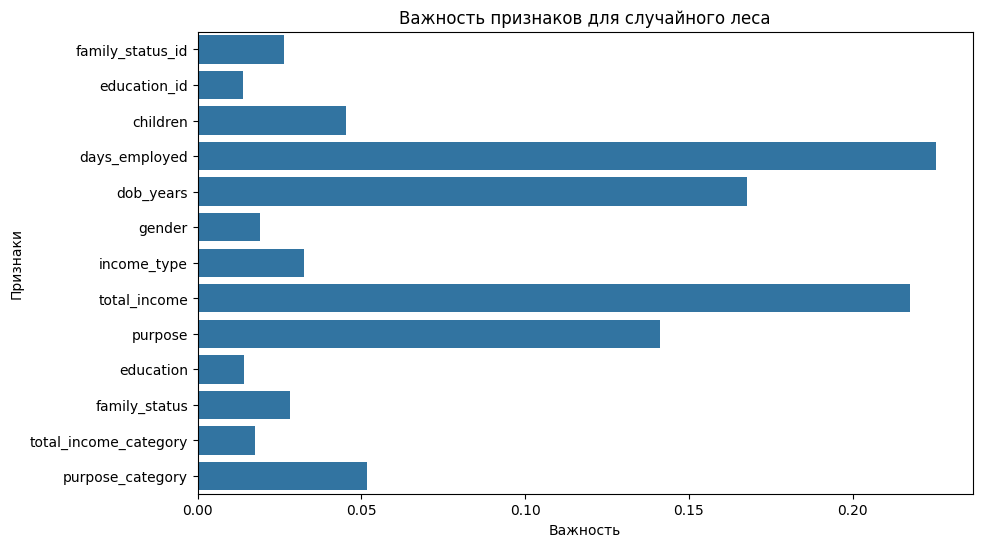

In [39]:
# Важность признаков для случайного леса
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Важность признаков для случайного леса')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

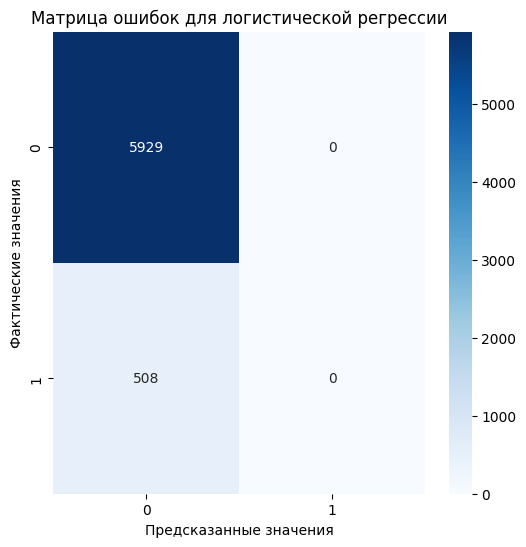

In [40]:
# Матрица ошибок для логистической регрессии
cm_log_reg = confusion_matrix(Ytst, Y_predict_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок для логистической регрессии')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.show()

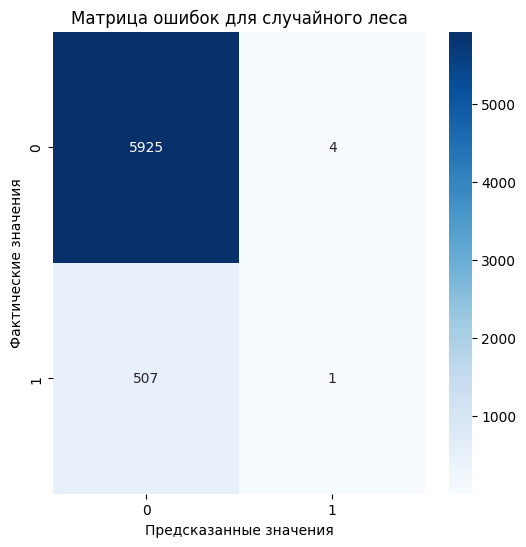

In [41]:
# Матрица ошибок для случайного леса
cm_rf_clf = confusion_matrix(Ytst, Y_predict_rfc)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf_clf, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок для случайного леса')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [42]:
y_pred_prob_log_reg = log_reg.predict_proba(Xtst)[:, 1]
y_pred_prob_rf_clf = rfc.predict_proba(Xtst)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(Ytst, y_pred_prob_log_reg)
fpr_rf_clf, tpr_rf_clf, _ = roc_curve(Ytst, y_pred_prob_rf_clf)

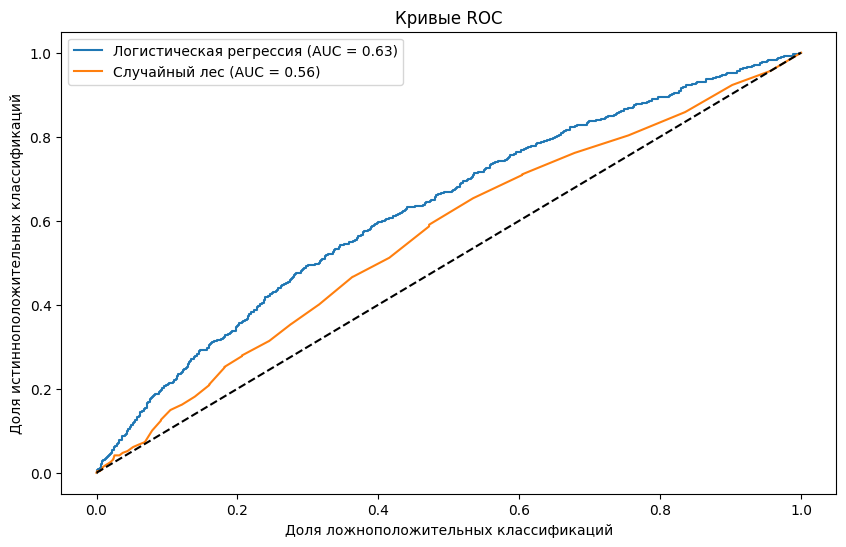

In [43]:
# Кривые ROC для обеих моделей
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Логистическая регрессия (AUC = {:.2f})'.format(roc_auc_score(Ytst, y_pred_prob_log_reg)))
plt.plot(fpr_rf_clf, tpr_rf_clf, label='Случайный лес (AUC = {:.2f})'.format(roc_auc_score(Ytst, y_pred_prob_rf_clf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Доля ложноположительных классификаций')
plt.ylabel('Доля истинноположительных классификаций')
plt.title('Кривые ROC')
plt.legend()
plt.show()